In [19]:
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame, merge, melt

from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols, independence_test, ext_ols, scailing, get_best_features

## 연습문제 (2)
#### 문제 (1)
다음의 데이터는 442명의 당뇨병 환자를 대상으로 검사 결과이다.



In [20]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


주어진 데이터는 표준화가 적용되어 있다.

이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

In [21]:
x_train = df.drop('target', axis =1)


In [22]:
model = PCA(len(x_train.columns))
model.fit(x_train)

PCA(n_components=10)

In [23]:
# explained_variance_ratio = model.explained_variance_ratio_ 
# explained_variance_ratio

In [24]:
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)
# cumulative_explained_variance

In [25]:
# n = np.where(cumulative_explained_variance >= 0.95)
# s = cumulative_explained_variance[n]
# print(s)
# k = len(s)
# k

In [26]:
model = pca(n_components=len(x_train))
fit = model.fit_transform(x_train)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >[WARNING]: >Number of components can not be more then number of features. n_components is set to 9
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':           age       sex       bmi        bp        s1        s2        s3  \
 PC1  0.216431  0.186967  0.303162  0.271738  0.343255  0.351861 -0.282437   
 PC2  0.044367 -0.386547 -0.156281 -0.138266  0.573027  0.455942  0.506239   
 PC3  0.494668 -0.106864  0.167527  0.513571 -0.068579 -0.269689  0.386032   
 PC4 -0.414012 -0.679860  0.499825 -0.019662 -0.068396 -0.167774 -0.076020   
 PC5 -0.686876  0.373464  0.129333  0.486874  0.129180  0.116722  0.245001   
 PC6 -0.225815  0.041705 -0.403151 -0.272783  0.005398 -0.133262  0.106354   
 PC7 -0.109530 -0.067622 -0.519874  0.320655  0.073644 -0.230535 -0.007548   
 PC8  0.014937  0.442933  0.392922 -0.477360  0.129411 -0.191325  0.324635   
 PC9  0.008100 -0.002106  0.042377  0.027194 -0.042038 -0.359316  0.481247   
 
            s4        s5        s6  
 PC1  0.428834  0.378618  0.322183  
 PC2 -0.068181 -0.026187 -0.084949  
 PC3 -0.380680  0.063630  0.276842  
 PC4  0.007921  0.264427  0.087085  
 PC5 -0.143646 -0.151

In [27]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC9,s4,0.773817,best
9,PC7,bmi,-0.519874,weak


In [28]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature


['age', 's5', 'sex', 's4', 's1', 'bp', 's6']

In [29]:
ols = ext_ols(df,'target',feature)
ols

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


(<statsmodels.regression.linear_model.OLS at 0x1bc2c8473d0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 target   R-squared:                       0.439
 Model:                            OLS   Adj. R-squared:                  0.430
 Method:                 Least Squares   F-statistic:                     48.44
 Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.06e-50
 Time:                        11:42:14   Log-Likelihood:                -2419.6
 No. Observations:                 442   AIC:                             4855.
 Df Residuals:                     434   BIC:                             4888.
 Df Model:                           7                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 --------

In [30]:
ols = my_ols(df, "target", feature)
ols.summary

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        11:42:14   Log-Likelihood:                -2419.6
No. Observations:                 442   AIC:                             4855.
Df Residuals:                     434   BIC:                             4888.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.770     54.932      0.000     146.690     157.577
age           -8.6419     64.182     -0.135      0.893    -134.789     117.505
s5           642.7408     82.452      7.795      0.000     480.686     804.795
sex         -290.7876     64.800     -4.487      0.000    -418.148    -163.427
s4           412.2661     84.704      4.867      0.000     245.785     578.747
s1          -358.8123     74.225     -4.834      0.000    -504.698    -212.927
bp           456.9719     68.115      6.709      0.000     323.095     590.849
s6           150.1445     70.100      2.142      0.033      12.366     287.923
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
mdf = merge(x_train,df['target'],left_index=True, right_index= True)
model2 = my_ols(mdf,y='target',x=feature)
model2.summary

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        11:42:14   Log-Likelihood:                -2419.6
No. Observations:                 442   AIC:                             4855.
Df Residuals:                     434   BIC:                             4888.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.770     54.932      0.000     146.690     157.577
age           -8.6419     64.182     -0.135      0.893    -134.789     117.505
s5           642.7408     82.452      7.795      0.000     480.686     804.795
sex         -290.7876     64.800     -4.487      0.000    -418.148    -163.427
s4           412.2661     84.704      4.867      0.000     245.785     578.747
s1          -358.8123     74.225     -4.834      0.000    -504.698    -212.927
bp           456.9719     68.115      6.709      0.000     323.095     590.849
s6           150.1445     70.100      2.142      0.033      12.366     287.923
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결과 비교를 위한 데이터 프레임 생성

In [32]:
rdf = DataFrame({
    's6': mdf['s6'],
    'y': mdf['target'],
    'y1': model2.fit.predict(x_train)
})

rdf


,s6,y,y1
0,-0.017646,151,172.007474
1,-0.092204,75,82.086360
2,-0.025930,141,147.306696
3,-0.009362,206,172.080542
4,-0.046641,135,145.020055
...,...,...,...
437,0.007207,178,186.443274
438,0.044485,104,98.010573
439,0.015491,132,125.962704
440,-0.025930,220,195.884545


실제 값과 model1의 예측 결과를 재배치

In [33]:
mdf1 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y1'])
mdf1


,s6,variable,value
0,-0.017646,y,151.000000
1,-0.092204,y,75.000000
2,-0.025930,y,141.000000
3,-0.009362,y,206.000000
4,-0.046641,y,135.000000
...,...,...,...
879,0.007207,y1,186.443274
880,0.044485,y1,98.010573
881,0.015491,y1,125.962704
882,-0.025930,y1,195.884545


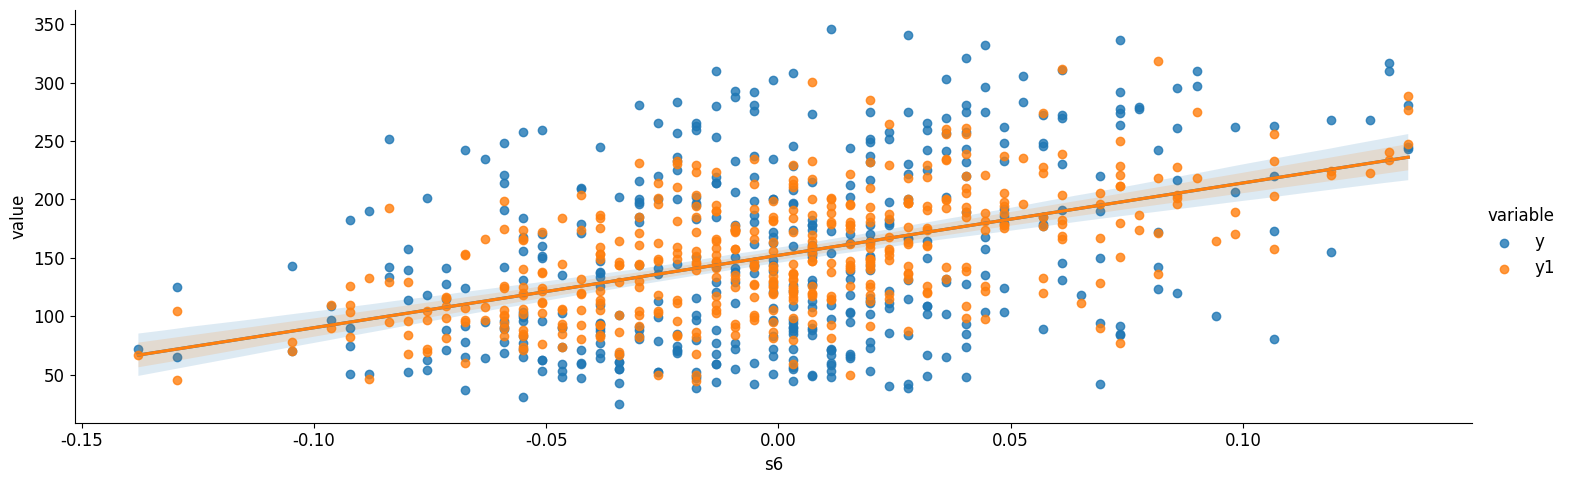

In [34]:
plt.rcParams["font.size"] = 12
plt.rcParams["axes.unicode_minus"] = False

sb.lmplot(data=mdf1, x="s6", y="value", hue="variable", height=5, aspect=3)

plt.show()
plt.close()


## 문제 (2)
다음의 데이터 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

다양한 변수 중에서 목표로 하는 종속변수는 rent이다. 분석하라

In [35]:
df2 = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df2

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [39]:
df2.drop(['neighborhood','borough'],axis =1,inplace=True)
x_train_std_df, y_train_std_df = scailing(df2,'rent')


In [40]:
x_train_std_df.head()

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1.21585,2.336243,-0.436784,-0.625393,1.546964,2.094423,-0.241482,2.171931
1,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,-0.82247,-0.428038,-0.436784,-0.625393,-0.646428,-0.477459,-0.241482,-0.460420
2,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,-0.82247,2.336243,-0.436784,1.598995,1.546964,2.094423,-0.241482,-0.460420
3,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931
4,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,-0.82247,-0.428038,-0.436784,1.598995,1.546964,2.094423,-0.241482,2.171931


In [41]:
y_train_std_df.head()

,rent
0,-0.818669
1,2.011480
2,-0.202044
3,-0.108760
4,3.908786


In [42]:
feature, topfeat_df = get_best_features(x_train_std_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [45]:
model2 = PCA(len(x_train_std_df.columns))
model2.fit(x_train_std_df)

PCA(n_components=14)

In [51]:
explained_variance_ratio = model2.explained_variance_ratio_ 
explained_variance_ratio

array([0.24486605, 0.18270668, 0.11297318, 0.07090759, 0.06819154,
       0.06540353, 0.05751875, 0.04197184, 0.03954447, 0.03846359,
       0.02580105, 0.01970022, 0.01924449, 0.01270702])

In [52]:
cumulative_explained_variance= np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.24486605, 0.42757273, 0.54054591, 0.6114535 , 0.67964504,
       0.74504857, 0.80256733, 0.84453916, 0.88408364, 0.92254723,
       0.94834828, 0.96804849, 0.98729298, 1.        ])

In [53]:
n = np.where(cumulative_explained_variance2 >= 0.95)
s = cumulative_explained_variance[n]
print(s)
k = len(s)
k

[0.96804849 0.98729298 1.        ]


3

In [55]:
model = pca(n_components=k)
fit = model.fit_transform(x_train_std_df)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':      bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
 PC1  0.054996   0.080544   0.088606       0.000835  0.071535   
 PC2  0.556270   0.564576   0.573485       0.080037  0.094317   
 PC3 -0.084116   0.029650  -0.068881       0.326896  0.540002   
 
      building_age_yrs    no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
 PC1         -0.050415 -0.120679      0.386343          0.319092     0.436223   
 PC2         -0.028496 -0.067964     -0.062958         -0.039396    -0.074046   
 PC3         -0.638744  0.418667     -0.004274         -0.008729    -0.010283   
 
      has_elevator  has_dishwasher  has_patio   has_gym  
 PC1      0.453207        0.328906   0.136032  0.432390  
 PC2     -0.070577       -0.037407   0.001233 -0.069419  
 PC3     -0.010204       -0.037476   0.060820  0.012398  ,
 'PC':            PC1       PC2       PC3
 0     2.409288 -2.180691  0.911322
 1    -0.969422  2.343038 -1.814942
 2     2.928500 -0.614535  1.657286
 3     2.726596 -

In [56]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,has_elevator,0.453207,best
1,PC2,size_sqft,0.573485,best
2,PC3,building_age_yrs,-0.638744,best
3,PC2,bedrooms,0.556270,weak
4,PC2,bathrooms,0.564576,weak
5,PC3,min_to_subway,0.326896,weak
6,PC3,floor,0.540002,weak
7,PC3,no_fee,0.418667,weak
8,PC1,has_roofdeck,0.386343,weak
9,PC1,has_washer_dryer,0.319092,weak


In [57]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature


['has_elevator', 'building_age_yrs', 'size_sqft']

In [58]:
ols = ext_ols(df2,'rent',feature)
ols

['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']


(<statsmodels.regression.linear_model.OLS at 0x1bc2e72f490>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   rent   R-squared:                       0.756
 Model:                            OLS   Adj. R-squared:                  0.756
 Method:                 Least Squares   F-statistic:                     3653.
 Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
 Time:                        11:58:44   Log-Likelihood:                -31046.
 No. Observations:                3539   AIC:                         6.210e+04
 Df Residuals:                    3535   BIC:                         6.212e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 --

In [ ]:
ols = my_ols(df2, "rent", feature)
ols.summary

['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     956.3
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:35:48   Log-Likelihood:                -30871.
No. Observations:                3539   AIC:                         6.177e+04
Df Residuals:                    3525   BIC:                         6.186e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -434.6184     95.896     -4.532      0.000    -622.635    -246.602
bedrooms          -314.0735     42.612     -7.371      0.000    -397.620    -230.527
floor               23.0182      2.512      9.162      0.000      18.092      27.944
size_sqft            4.9190      0.101     48.565      0.000       4.720       5.118
min_to_subway      -16.3984      4.651     -3.526      0.000     -25.517      -7.280
has_washer_dryer   149.5545     79.776      1.875      0.061      -6.857     305.967
has_roofdeck        16.6751     87.222      0.191      0.848    -154.336     187.686
has_patio         -110.8805    111.912     -0.991      0.322    -330.300     108.539
has_elevator        10.8227     77.385      0.140      0.889    -140.901     162.547
has_gym            -60.6061     92.382     -0.656      0.512    -241.733     120.521
building_age_yrs    -7.4959      0.725    -10.336      0.000      -8.918      -6.074
no_fee            -119.4533     53.911     -2.216      0.027    -225.153     -13.753
bathrooms         1180.4018     74.523     15.839      0.000    1034.290    1326.514
has_dishwasher     -28.7686     76.488     -0.376      0.707    -178.734     121.197
==============================================================================
Omnibus:                     1009.583   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10453.166
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                      11.152   Cond. No.                     4.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

  'floor의 회귀계수는 23.0182(p<0.05)로, rent에 대하여 유의미한 예측변인인 것으로 나타났다.',
  'size_sqft의 회귀계수는 4.9190(p<0.05)로, rent에 대하여 유의미한 예측변인인 것으로 나타났다.',
  'min_to_subway의 회귀계수는 -16.3984(p<0.05)로, rent에 대하여 유의미한 예측변인인 것으로 나타났다.',
  'has_washer_dryer의 회귀계수는 149.5545(p>0.05)로, rent에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
  'has_roofdeck의 회귀계수는 16.6751(p>0.05)로, rent에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
  'has_patio의 회귀계수는 -110.8805(p>0.05)로, rent에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
  'has_elevator의 회귀계수는 10.8227(p>0.05)로, rent에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
  'has_gym의 회귀계수는 -60.6061(p>0.05)로, rent에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
  'building_age_yrs의 회귀계수는 -7.4959(p<0.05)로, rent에 대하여 유의미한 예측변인인 것으로 나타났다.',
  'no_fee의 회귀계수는 -119.4533(p<0.05)로, rent에 대하여 유의미한 예측변인인 것으로 나타났다.',
  'bathrooms의 회귀계수는 1180.4018(p<0.05)로, rent에 대하여 유의미한 예측변인인 것으로 나타났다.',
  'has_dishwasher의 회귀계수는 -28.7686(p>0.05)로, rent에 대하여 유의하지 않은 예측변인인 것으로 나타났다.'])

In [59]:
ols = my_ols(df2, "rent", ['has_elevator', 'building_age_yrs', 'size_sqft'])
ols.summary

['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     3653.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:59:47   Log-Likelihood:                -31046.
No. Observations:                3539   AIC:                         6.210e+04
Df Residuals:                    3535   BIC:                         6.212e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          364.5742     69.270      5.263      0.000     228.760     500.388
has_elevator        56.5041     57.769      0.978      0.328     -56.760     169.769
building_age_yrs   -11.3128      0.668    -16.925      0.000     -12.623     -10.002
size_sqft            5.6888      0.055    103.398      0.000       5.581       5.797
==============================================================================
Omnibus:                      897.861   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11182.898
Skew:                           0.849   Prob(JB):                         0.00
Kurtosis:                      11.542   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
ols_result = my_ols(mdf, y='rent', x=feature)
ols_result.summary

['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym', 'rent']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     3653.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:28:15   Log-Likelihood:                -2524.7
No. Observations:                3539   AIC:                             5057.
Df Residuals:                    3535   BIC:                             5082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -3.99e-17      0.008   -4.8e-15      1.000      -0.016       0.016
has_elevator         0.0081      0.008      0.978      0.328      -0.008       0.024
building_age_yrs    -0.1409      0.008    -16.925      0.000      -0.157      -0.125
size_sqft            0.8597      0.008    103.398      0.000       0.843       0.876
==============================================================================
Omnibus:                      897.861   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11182.898
Skew:                           0.849   Prob(JB):                         0.00
Kurtosis:                      11.542   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 실제 임대료와 예측된 임대료 비교

In [67]:
    'x': mdf['size_sqft'],
rdf = DataFrame({
    'rent': mdf['rent'],
    'y': ols_result.fit.predict(x_train_std_df)
})

rdf


,x,rent,y
0,-0.962011,-0.818669,-0.689214
1,2.218694,2.011480,1.744639
2,-0.049651,-0.202044,0.052179
3,0.073811,-0.108760,0.151159
4,8.077886,3.908786,6.656334
...,...,...,...
3534,-0.853197,-0.293747,-0.592094
3535,0.101014,0.485729,0.253246
3536,-1.443302,-1.087770,-1.403436
3537,-0.604182,-0.526167,-0.370870


In [69]:
melt_df = melt(rdf, id_vars=['x'], value_vars=['rent','y'])
melt_df

,x,variable,value
0,-0.962011,rent,-0.818669
1,2.218694,rent,2.011480
2,-0.049651,rent,-0.202044
3,0.073811,rent,-0.108760
4,8.077886,rent,3.908786
...,...,...,...
7073,-0.853197,y,-0.592094
7074,0.101014,y,0.253246
7075,-1.443302,y,-1.403436
7076,-0.604182,y,-0.370870


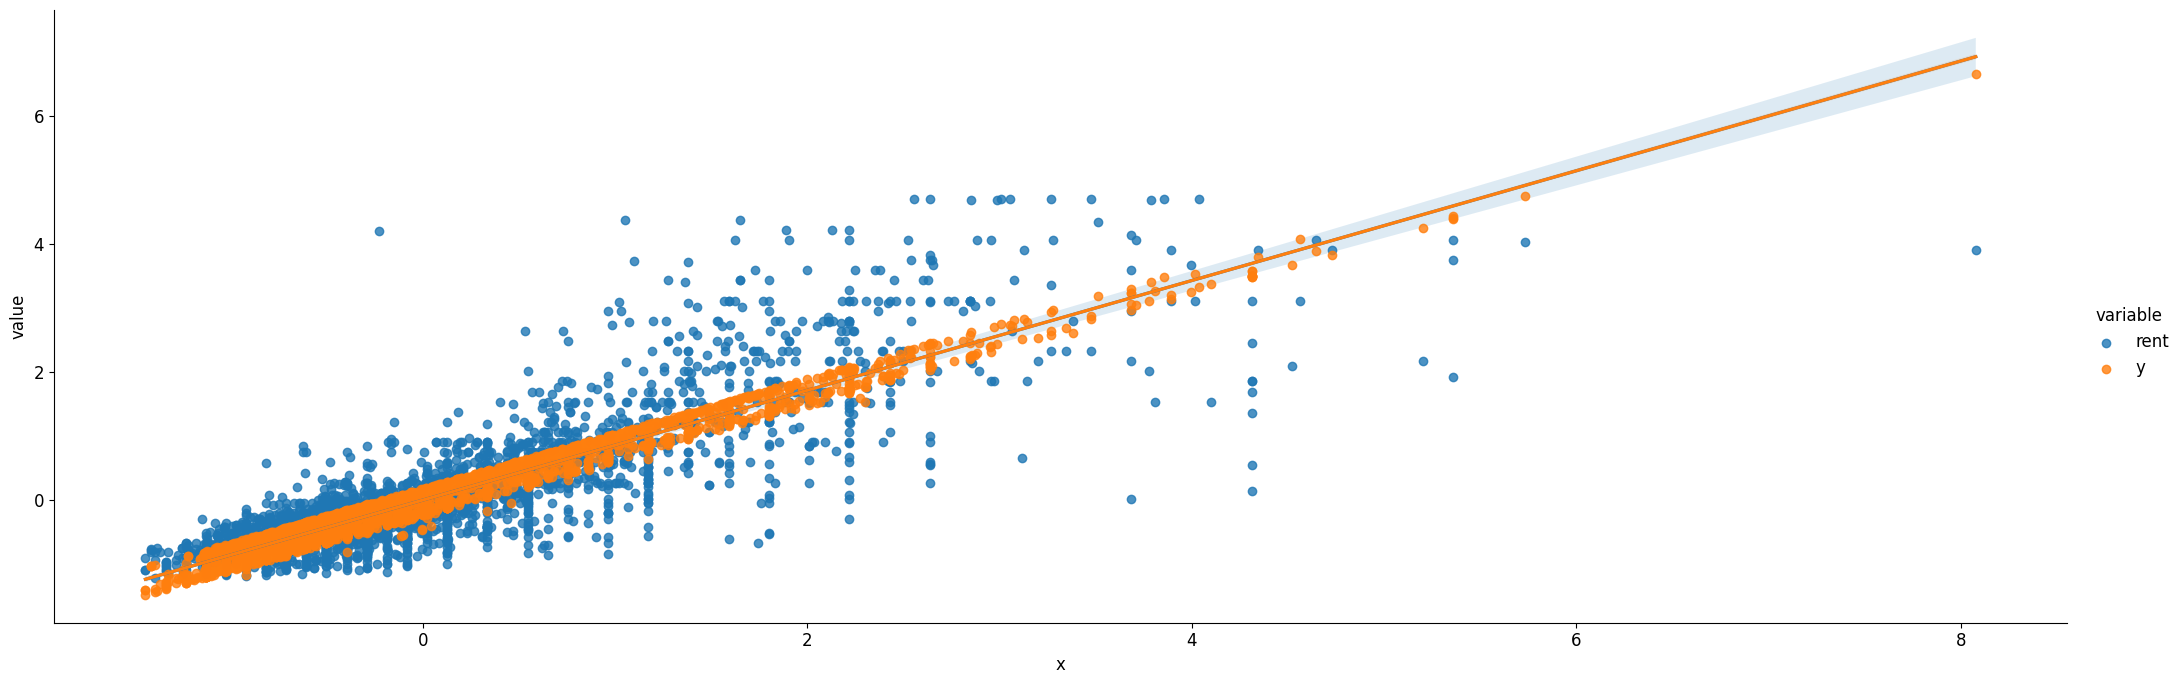

In [70]:
sb.lmplot(data=melt_df, x="x", y="value", hue="variable", height=7, aspect=3)
plt.show()
plt.close()